# Inferential statistics

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("QMS210Group_51.csv")

In [3]:
df.head()

,YEAR,Model_SE_LE,Transm,Engine,TYPE_A,Cond,Color,Auction,Price,Odometer,...,SILVER,BEIGE,GREEN,GOLD,California,SEATTLE,DALLAS,ORLANDO,Pennsylvan,OHIO
0,2010,4D SEDAN LE,A,4,Open,Avg,GRAY,NASHVILL,8190,104770,...,0,0,0,0,0,0,0,0,0,0
1,2012,4D SEDAN SE,M,4,Open,Avg,WHITE,ATLANTA,15300,45460,...,0,0,0,0,0,0,0,0,0,0
2,2011,4D SEDAN LE,A,4,Open,Above,GRAY,NASHVILL,11610,44230,...,0,0,0,0,0,0,0,0,0,0
3,2013,4D SEDAN SE,A,4,Open,Below,GRAY,NewJersey,13050,52970,...,0,0,0,0,0,0,0,0,0,0
4,2012,4D SEDAN SE,A,6,Open,Avg,WHITE,MILWAUKE,15450,31223,...,0,0,0,0,0,0,0,0,0,0


### 1.Confidence Interval estimate
- Range of numbers constructed around the Point estimate based on % confidence interval
- Confidence intervals are a way of quantifying the uncertainty of an estimate

**Construct interval estimate for Price of all car population at 95% C.L**

In [4]:
df.Price.mean()

13775.861666666666

In [5]:
np.std(df.Price) # std population

3125.0425494485494

In [6]:
np.std(df.Price,ddof=1) # std sample

3127.650011353533

In [7]:
df.Price.std() # std sample

3127.650011353533

In [8]:
st.sem(df.Price,ddof=1) # sample
# Standard error express how the Sample results vary from sample to sample 
# If sample size increase X times, the standard error will decrease 1/√𝑥 times
# The Standard Error of the Mean describes how far a sample mean may vary from the population mean

127.68577703043617

In [9]:
confidence_level= 0.95

In [10]:
# Normal distribution (Only used when std of population is known)
st.norm.interval(alpha=confidence_level, loc=df.Price.mean(), scale=st.sem(df.Price,ddof=0))

(13525.810778920753, 14025.912554412578)

In [11]:
# Student's t distribution (used when std of population is unknown)
interval= st.t.interval(confidence_level, df.Price.shape[0]-1, df.Price.mean(), st.sem(df.Price,ddof=1))
# At 95% condifence, we can conclude that mean Odometer of all cars population is within below interval
# If we choose another different 600 samples, 95% interval construct would include population mean
interval

(13525.095451424957, 14026.627881908375)

C:\Users\tangh\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

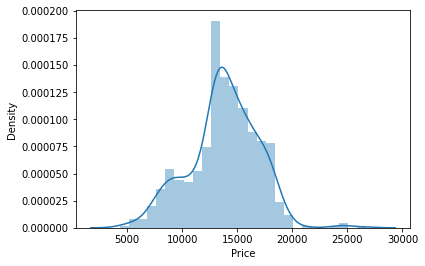

In [12]:
sns.distplot(df.Price,hist=True)

**Construct Confidence interval for a sample with Mean=7.5, std=2.3, n=100, Confidence level=95%**

In [13]:
mu = 7.5
std = 2.3
n=100
heights = st.norm.rvs(loc=mu, scale=std, size=n) 
# create normal distribution database

In [14]:
len(heights)

100

In [15]:
st.t.ppf(0.975, n-1)
#t Value 

1.9842169515086827

In [16]:
st.t.interval(0.95, n-1, loc=heights.mean(), scale=st.sem(heights,ddof=1)) 
# Confident interval

(7.2389978075292, 8.069501780365425)

In [17]:
import statsmodels.stats.api as sms
sms.DescrStatsW(heights).tconfint_mean(alpha=0.025,  alternative='smaller')

(-inf, 8.069501780365425)

In [18]:
sms.DescrStatsW(heights).tconfint_mean(alpha=0.025,  alternative='larger')

(7.238997807529199, inf)

**Construct interval estimate for percentage of Silver car population at 90% C.L**

In [19]:
import statsmodels
from statsmodels.stats import proportion

In [20]:
df.SILVER.sum()

95

In [21]:
statsmodels.stats.proportion.proportion_confint(df.SILVER.sum(), df.shape[0], alpha=0.1, method='normal')
# With 90% confidence, the percentage of Silver car in all car population is between 13%-18%

(0.13381968943683384, 0.1828469772298328)

### 2.One population T Test
- The One Sample t Test examines whether the mean of a population is statistically different from a known or hypothesized value. The One Sample t Test is a parametric test
- Use t test when population std is unknown (most of the case)
- https://libguides.library.kent.edu/SPSS/OneSampletTest

**Is there evidence that the population mean odometer reading of the used cars at auction is equal to 45,000 miles at the 0.09 level of significance?**


In [22]:
from scipy.stats import ttest_1samp

In [23]:
df.Odometer.mean()

44765.331666666665

In [24]:
tscore, pvalue = ttest_1samp(df.Odometer, popmean=45000)
#tSTAT and p-value

*Critical value*

In [25]:
tscore
#tscore > abs|critical value|--> Reject H0

-0.1842003392532204

In [26]:
st.t.ppf(.09/2,df.Odometer.shape[0]-1) #left tail critical value

-1.6981436476719858

In [27]:
st.t.ppf(1-.09/2,df.Odometer.shape[0]-1) # right tail critical value

1.6981436476719853

*p-value*

In [28]:
pvalue
# pvalue > 0.09 --> not reject H0. There is insufficient evidence exists to prove that population mean is different from 45,000
# p-value is the probability of getting a sample result (mean=44,765) if H0 is correct (parameter mean= 45,000)

0.8539186343710293

### 3.One population Z Test for proportion

**Is there evidence that the propotion of Silver car in total all population car is equal to 10% at the 0.09 level of significance?**

In [29]:
from statsmodels.stats.proportion import proportions_ztest

In [30]:
stat, p_value = proportions_ztest(count=df.SILVER.sum(), nobs=600, value=0.10, alternative='two-sided')

In [31]:
stat
# stat > |Critical value| --> reject H0
# Proportion of Silver car among all population is different from 10%

3.914138400256522

In [32]:
st.norm.ppf(.05)
#Critical value

-1.6448536269514729

In [33]:
p_value.round(4)
# If H0 is true (% of Silver car among all population is 10%), 
# probability of getting a sample result of 15.8% form a test is ~0%

0.0001

### 4. Two independent T Test
- Determine if 2 population have same variance using Levene test
- Using suittable test based on result of variance test

**Is there evidence that the population mean ODOMETER READING of 4-cylinder cars is greater than that of 6-cylinder cars? 
at a 5% level of significance**


*Hypothesis*
- Ho: M4-cylinder <=M6-cylinder
- H1: M4-cylinder >M6-cylinder

*Levene Test for population Variance*

In [34]:
cylinder_4= df[df.Engine==4].Odometer

In [35]:
cylinder_6= df[df.Engine==6].Odometer

In [36]:
w, pvalue= st.levene(cylinder_4,cylinder_6,center= 'mean')

In [37]:
w

5.162459662779704

In [38]:
pvalue
# p-value<0.05 --> Different variance between 2 population

0.0234344399060039

*Perform test for 2 independent population*

In [39]:
tu, pu= st.ttest_ind(cylinder_4,cylinder_6,equal_var=False)
# t-test for unequal variance

In [40]:
tu
#tSTAT is not change regardless of 2 tails of 1 tail test

0.6618688380950536

In [41]:
st.t.ppf(1-.05,df.Odometer.shape[0]-1) # M4-cylinder <=M6-cylinder, upper tail
# tu < critical value --> Do not reject H0

1.6474014447241638

In [42]:
pu/2
# p value of one tail test > 0.09 --> Can't reject H0
# there is insufficient evidence exists to prove H1

0.2542983791038035

In [43]:
te, pe= st.ttest_ind(cylinder_4,cylinder_6,equal_var=True)
# t-test for equal variance

In [44]:
te
#tSTAT is regardless of 2 tails of 1 tail test

0.6015180452552844

In [45]:
pe/2
# p value of one tail test > 0.05 --> Can't reject H0
# there is insufficient evidence exists to prove H1

0.27386147731860566

*using researchpy package*
- https://www.pythonfordatascience.org/independent-samples-t-test-python/

In [46]:
import researchpy as rp

In [47]:
rp.ttest(group1=cylinder_4, group2=cylinder_6, group1_name="cylinder4",group2_name="cylinder6",equal_variances=False,paired=False)

(    Variable      N          Mean            SD           SE     95% Conf.  \
 0  cylinder4  457.0  45194.229759  32430.236733  1517.022489  42213.007604   
 1  cylinder6  143.0  43394.657343  26982.250151  2256.369110  38934.242080   
 2   combined  600.0  44765.331667  31206.113832  1273.984262  42263.312889   
 
        Interval  
 0  48175.451914  
 1  47855.072605  
 2  47267.350444  ,
                           Welch's t-test    results
 0  Difference (cylinder4 - cylinder6) =   1799.5724
 1                  Degrees of freedom =    283.2796
 2                                   t =      0.6619
 3               Two side test p value =      0.5086
 4              Difference < 0 p value =      0.7457
 5              Difference > 0 p value =      0.2543
 6                           Cohen's d =      0.0576
 7                           Hedge's g =      0.0576
 8                       Glass's delta =      0.0555
 9                         Pearson's r =      0.0393)

*Check if population distribution is normal*
- One of the assumptions is that the sampling distribution is normally distributed. This test of normality applies to the difference in values between the groups. One method for testing this assumption is the Shapiro-Wilk test. This can be completed using the shapiro() method from Scipy.stats

In [48]:
st.shapiro(cylinder_4) #pvalue is very small

ShapiroResult(statistic=0.886634111404419, pvalue=7.744446224983832e-18)

In [49]:
st.shapiro(cylinder_6) #pvalue is very small

ShapiroResult(statistic=0.8688956499099731, pvalue=6.414770381546475e-10)

C:\Users\tangh\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


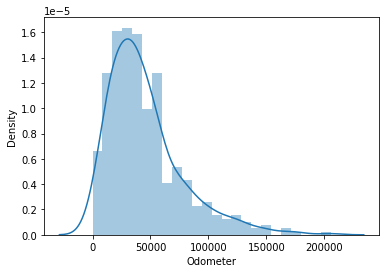

In [50]:
sns.distplot(cylinder_4);

C:\Users\tangh\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


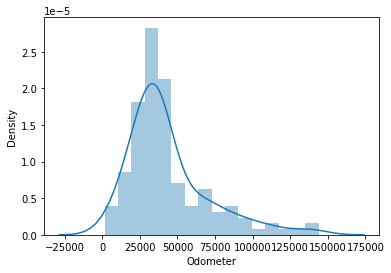

In [51]:
sns.distplot(cylinder_6);

**Is there evidence that the % of Silver car is greater than that of Red car at a 9% level of significance**
- prop1 : Silver
- prop2: Red
- Ho: prop1 - prop2<=0 ->upper
- H1: prop1 - prop2>0 -> Larger test

https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.test_proportions_2indep.html#statsmodels.stats.proportion.test_proportions_2indep

In [52]:
df.head()

,YEAR,Model_SE_LE,Transm,Engine,TYPE_A,Cond,Color,Auction,Price,Odometer,...,SILVER,BEIGE,GREEN,GOLD,California,SEATTLE,DALLAS,ORLANDO,Pennsylvan,OHIO
0,2010,4D SEDAN LE,A,4,Open,Avg,GRAY,NASHVILL,8190,104770,...,0,0,0,0,0,0,0,0,0,0
1,2012,4D SEDAN SE,M,4,Open,Avg,WHITE,ATLANTA,15300,45460,...,0,0,0,0,0,0,0,0,0,0
2,2011,4D SEDAN LE,A,4,Open,Above,GRAY,NASHVILL,11610,44230,...,0,0,0,0,0,0,0,0,0,0
3,2013,4D SEDAN SE,A,4,Open,Below,GRAY,NewJersey,13050,52970,...,0,0,0,0,0,0,0,0,0,0
4,2012,4D SEDAN SE,A,6,Open,Avg,WHITE,MILWAUKE,15450,31223,...,0,0,0,0,0,0,0,0,0,0


In [53]:
st.norm.ppf(1-.09) # Critical value of upper tail

1.3407550336902165

In [54]:
df.SILVER.sum()

95

In [55]:
df.RED.sum()

59

In [56]:
statsmodels.stats.proportion.test_proportions_2indep(95, 600,59, 600, value=None, method=None, compare='diff', alternative='larger', correction=True, return_results=True)

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 3.1017088531973718
pvalue = 0.0009620354621901095
compare = diff
method = agresti-caffo
diff = 0.06
ratio = 1.6101694915254237
odds_ratio = 1.724953851317335
variance = 0.00037171489126816895
alternative = larger
value = 0
tuple = (3.1017088531973718, 0.0009620354621901095)

- tSTAT > critical value (1.34) 
- p-value<0.09
- Reject H0: Accept that % Silver car > % Red car

### 5.Paired test

In [57]:
marketing= pd.read_csv("marketing_data.csv")

In [58]:
marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,Spain


In [59]:
marketing.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [60]:
marketing.MntSweetProducts.mean()

27.06294642857143

In [61]:
marketing.MntFruits.mean()

26.302232142857143

**at 0.05 level of significance, is there evidence of a difference in the average spending between Sweet Products and Fruits?**
- Ho: equal mean
- H1: different mean

In [62]:
t,p= st.ttest_rel(marketing.MntSweetProducts,marketing.MntFruits,alternative='two-sided')
# test difference in mean between 2 related sample

In [63]:
t

0.9542301514669155

In [64]:
st.t.ppf(1-.025,marketing.shape[0]-1) # critical value of 2 tail test

1.9610240704476323

In [65]:
p
#p>0.05 -> Can not reject H0: equal mean

0.3400701626329289

### 6.One way ANOVA
-https://www.pythonfordatascience.org/anova-python/
- Populations are normally distributed (Shapiro test or visualization)
- Populations have equal variance (Levene test)
- Samples are randomly and independently selected

**Is there any difference in average car Price across Year**

In [66]:
df.YEAR.value_counts()

2012    171
2014     97
2015     96
2013     91
2010     79
2011     66
Name: YEAR, dtype: int64

In [67]:
df.Price.head()

0     8190
1    15300
2    11610
3    13050
4    15450
Name: Price, dtype: int64

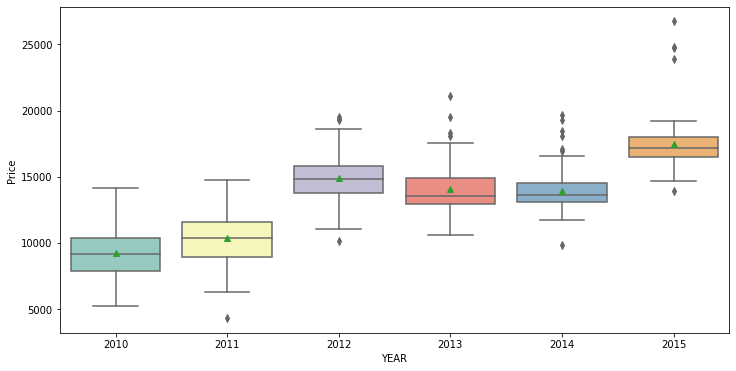

In [68]:
plt.figure(figsize=(12,6))
sns.boxplot(x="YEAR",y="Price",data=df, palette="Set3",showmeans= True);
# Check distribution

*Check equal variance (Levene test)*

In [69]:
st.levene(df.Price[df.YEAR==2010],df.Price[df.YEAR==2011],df.Price[df.YEAR==2012],df.Price[df.YEAR==2012],df.Price[df.YEAR==2014],
          df.Price[df.YEAR==2015],center='mean')

LeveneResult(statistic=2.1873621906775687, pvalue=0.053954562223875735)

- p-value >0.05 -> equal variance

*using ANOVA*

In [70]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [71]:
model = ols('Price ~C(YEAR)',data=df).fit()
anova_table= sm.stats.anova_lm(model,typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(YEAR),3.941102e+09,5.0,244.055004,2.044922e-141
Residual,1.918432e+09,594.0,NaN,NaN


*one-way ANOVA using scipy.stats*

In [72]:
df.Price[df.YEAR==2012]

1      15300
4      15450
5      14810
12     15120
14     14900
       ...  
585    14880
589    17780
591    12510
593    15580
599    15735
Name: Price, Length: 171, dtype: int64

In [73]:
F_oneway,pvalue= st.f_oneway(df.Price[df.YEAR==2010],df.Price[df.YEAR==2011],
            df.Price[df.YEAR==2012],df.Price[df.YEAR==2013],
           df.Price[df.YEAR==2014],df.Price[df.YEAR==2015])

In [74]:
F_oneway

244.05500440515038

In [75]:
round(pvalue,4)

0.0

In [76]:
rp.summary_cont(df['Price'].groupby(df['YEAR']))

,N,Mean,SD,SE,95% Conf.,Interval
YEAR,,,,,,
2010,79,9237.2785,1918.5534,215.8541,8807.5459,9667.0110
2011,66,10333.6364,1941.4787,238.9795,9856.3613,10810.9114
2012,171,14883.5965,1728.8080,132.2053,14622.6211,15144.5719
2013,91,14073.9670,1844.5390,193.3602,13689.8232,14458.1109
2014,97,13923.5155,1522.2714,154.5632,13616.7098,14230.3211
2015,96,17472.3438,1918.2116,195.7767,17083.6780,17861.0095


In [77]:
rp.summary_cont(df['Price'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Price,600.0,13775.8617,3127.65,127.6858,13525.0955,14026.6279


- the overall average price was 13,775 95% CI(13525,14026) 
- with group averages seems to increase by years
- There is a statistically significant difference between the groups with p-value= 0.000

### 7. Use Tukey HSD to identify which groups have difference average price

In [78]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [79]:
result= pairwise_tukeyhsd(endog=df.Price, groups=df.YEAR, alpha=0.05)

In [80]:
print(result)
# True means reject H0, sufficient evidence to accept H1, different in average price between Year

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
  2010   2011 1096.3579 0.0037   239.5248  1953.191   True
  2010   2012  5646.318  0.001  4947.3519 6345.2841   True
  2010   2013 4836.6886  0.001  4046.5778 5626.7993   True
  2010   2014  4686.237  0.001  3907.5648 5464.9092   True
  2010   2015 8235.0653  0.001  7454.5748 9015.5557   True
  2011   2012 4549.9601  0.001  3805.3964 5294.5239   True
  2011   2013 3740.3307  0.001  2909.6102 4571.0511   True
  2011   2014 3589.8791  0.001  2770.0304 4409.7278   True
  2011   2015 7138.7074  0.001  6317.1316 7960.2832   True
  2012   2013 -809.6295 0.0073 -1476.3282 -142.9307   True
  2012   2014  -960.081  0.001 -1613.1833 -306.9787   True
  2012   2015 2588.7473  0.001  1933.4782 3244.0164   True
  2013   2014 -150.4516    0.9  -900.2941   599.391  False
  2013   2015 3398.3767  0.001  2646.6461 4150.1073   Tr

In [81]:
df.head()

,YEAR,Model_SE_LE,Transm,Engine,TYPE_A,Cond,Color,Auction,Price,Odometer,...,SILVER,BEIGE,GREEN,GOLD,California,SEATTLE,DALLAS,ORLANDO,Pennsylvan,OHIO
0,2010,4D SEDAN LE,A,4,Open,Avg,GRAY,NASHVILL,8190,104770,...,0,0,0,0,0,0,0,0,0,0
1,2012,4D SEDAN SE,M,4,Open,Avg,WHITE,ATLANTA,15300,45460,...,0,0,0,0,0,0,0,0,0,0
2,2011,4D SEDAN LE,A,4,Open,Above,GRAY,NASHVILL,11610,44230,...,0,0,0,0,0,0,0,0,0,0
3,2013,4D SEDAN SE,A,4,Open,Below,GRAY,NewJersey,13050,52970,...,0,0,0,0,0,0,0,0,0,0
4,2012,4D SEDAN SE,A,6,Open,Avg,WHITE,MILWAUKE,15450,31223,...,0,0,0,0,0,0,0,0,0,0


### 8. Chi-square
- Testing relationship between categorical features
- Ho: there is no significant relationship between 2 features
- H1: there is significant relationship
- https://towardsdatascience.com/chi-square-test-for-independence-in-python-with-examples-from-the-ibm-hr-analytics-dataset-97b9ec9bb80a

In [82]:
table=pd.crosstab(df.YEAR, df.Color)

In [86]:
table

Color,BEIGE,BLACK,BLUE,GOLD,GRAY,GREEN,RED,SILVER,WHITE
YEAR,,,,,,,,,
2010,1,7,6,7,18,5,11,16,8
2011,1,10,7,1,18,0,7,10,12
2012,2,45,4,4,37,8,20,28,23
2013,0,12,4,0,30,3,8,13,21
2014,0,22,5,0,18,3,8,18,23
2015,2,19,15,2,24,3,5,10,16


In [88]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [89]:
stat,p,dof,expected= chi2_contingency(table)

In [90]:
(stat,p,dof,expected)
#p-value<0.05, reject H0, Dependent

(78.10702167172379,
 0.0002937562873141593,
 40,
 array([[ 0.79      , 15.14166667,  5.39833333,  1.84333333, 19.09166667,
          2.89666667,  7.76833333, 12.50833333, 13.56166667],
        [ 0.66      , 12.65      ,  4.51      ,  1.54      , 15.95      ,
          2.42      ,  6.49      , 10.45      , 11.33      ],
        [ 1.71      , 32.775     , 11.685     ,  3.99      , 41.325     ,
          6.27      , 16.815     , 27.075     , 29.355     ],
        [ 0.91      , 17.44166667,  6.21833333,  2.12333333, 21.99166667,
          3.33666667,  8.94833333, 14.40833333, 15.62166667],
        [ 0.97      , 18.59166667,  6.62833333,  2.26333333, 23.44166667,
          3.55666667,  9.53833333, 15.35833333, 16.65166667],
        [ 0.96      , 18.4       ,  6.56      ,  2.24      , 23.2       ,
          3.52      ,  9.44      , 15.2       , 16.48      ]]))